In [133]:
%matplotlib inline
%matplotlib notebook

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

## extract data from raw data set

In [307]:
filenames = ['data/189_2011.txt', 'data/189_2012.txt', 'data/189_2013.txt', 'data/189_2014.txt',
             'data/189_2015.txt', 'data/189_2016.txt', 'data/189_2017.txt', 'data/189_2018.txt',
             'data/189_2019.txt', 'data/189_2020.txt', 'data/189_2021.txt']
raw_data = []
for f in filenames:
    raw_data = np.concatenate((raw_data, np.loadtxt(f, delimiter=',', skiprows=1, dtype=str)))
data = np.genfromtxt((i[:-2] if i[-1] == '4' else '' for i in raw_data), skip_header=14, delimiter=';', 
                     dtype=[('date', 'U13'), ('height', 'float')])

In [308]:
file = open("data.txt", "w") 
for d in data:
    file.writelines([str(np.datetime64(pd.to_datetime(d[0], dayfirst=True), 'h'))+';', str(d[1])+'\n'])
file.close()

## load extracted data

In [318]:
data = np.genfromtxt('data.txt', dtype=[('date and time','datetime64[h]'),('height [m]','float')], delimiter=";")
dates = np.array([d[0] for d in data])
heights = np.array([d[1] for d in data])
mean_heights = np.mean(heights)

<IPython.core.display.Javascript object>


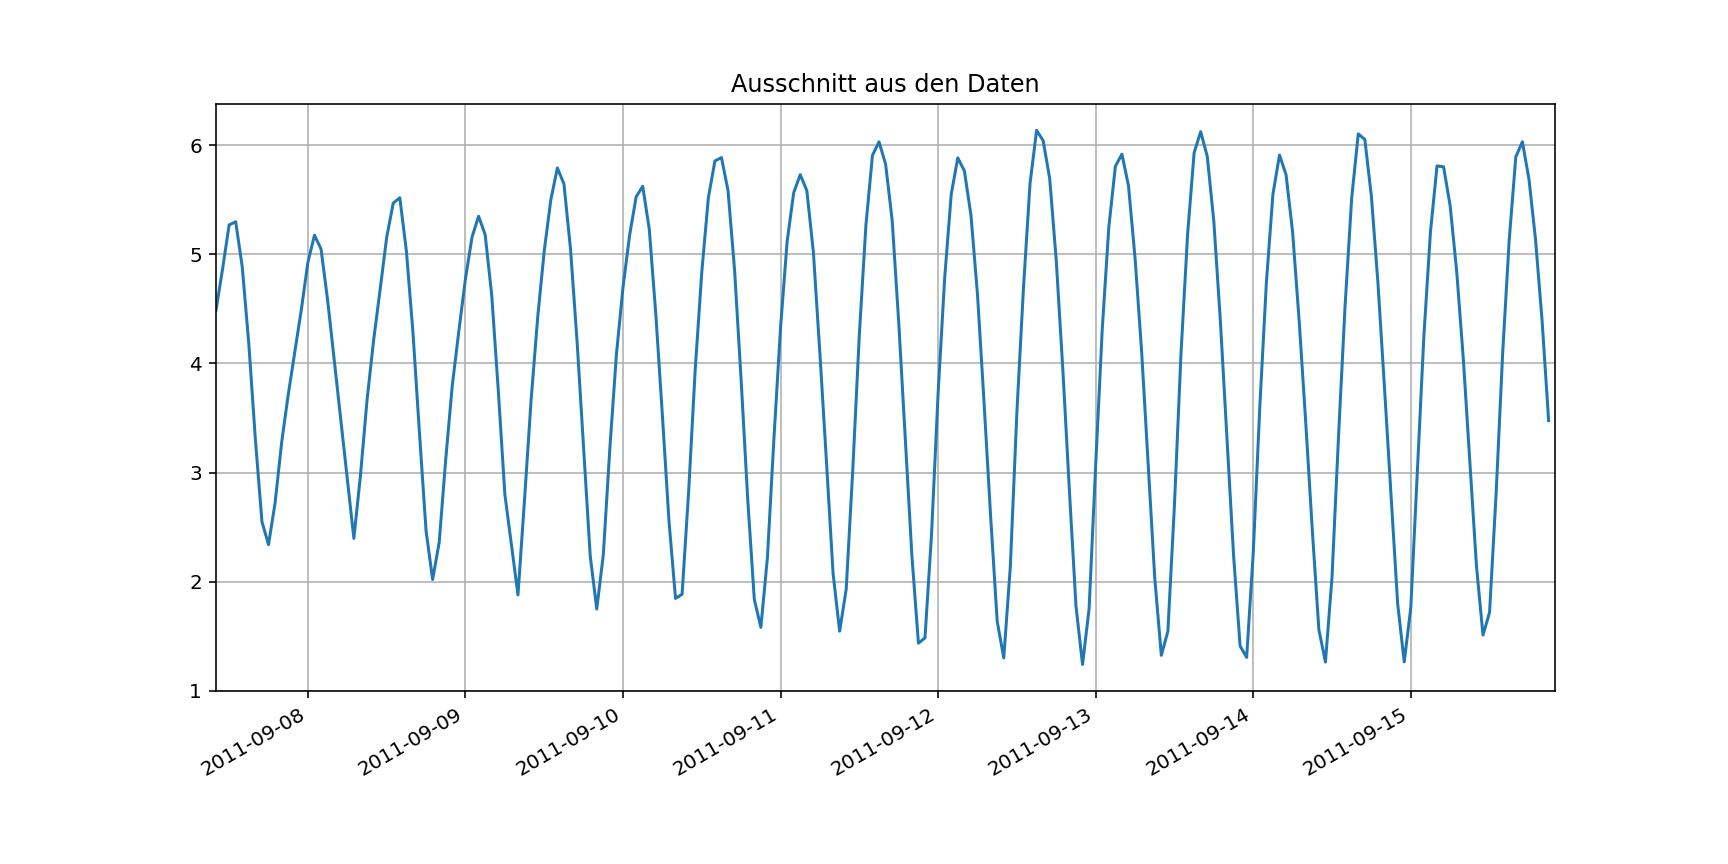

In [339]:
l = 200
plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()
ax.set_xlim((dates[0], dates[l]))
ax.plot(dates[:l], heights[:l], '-')
fig.autofmt_xdate()
ax.set_title('Ausschnitt aus den Daten')
ax.grid()

<IPython.core.display.Javascript object>


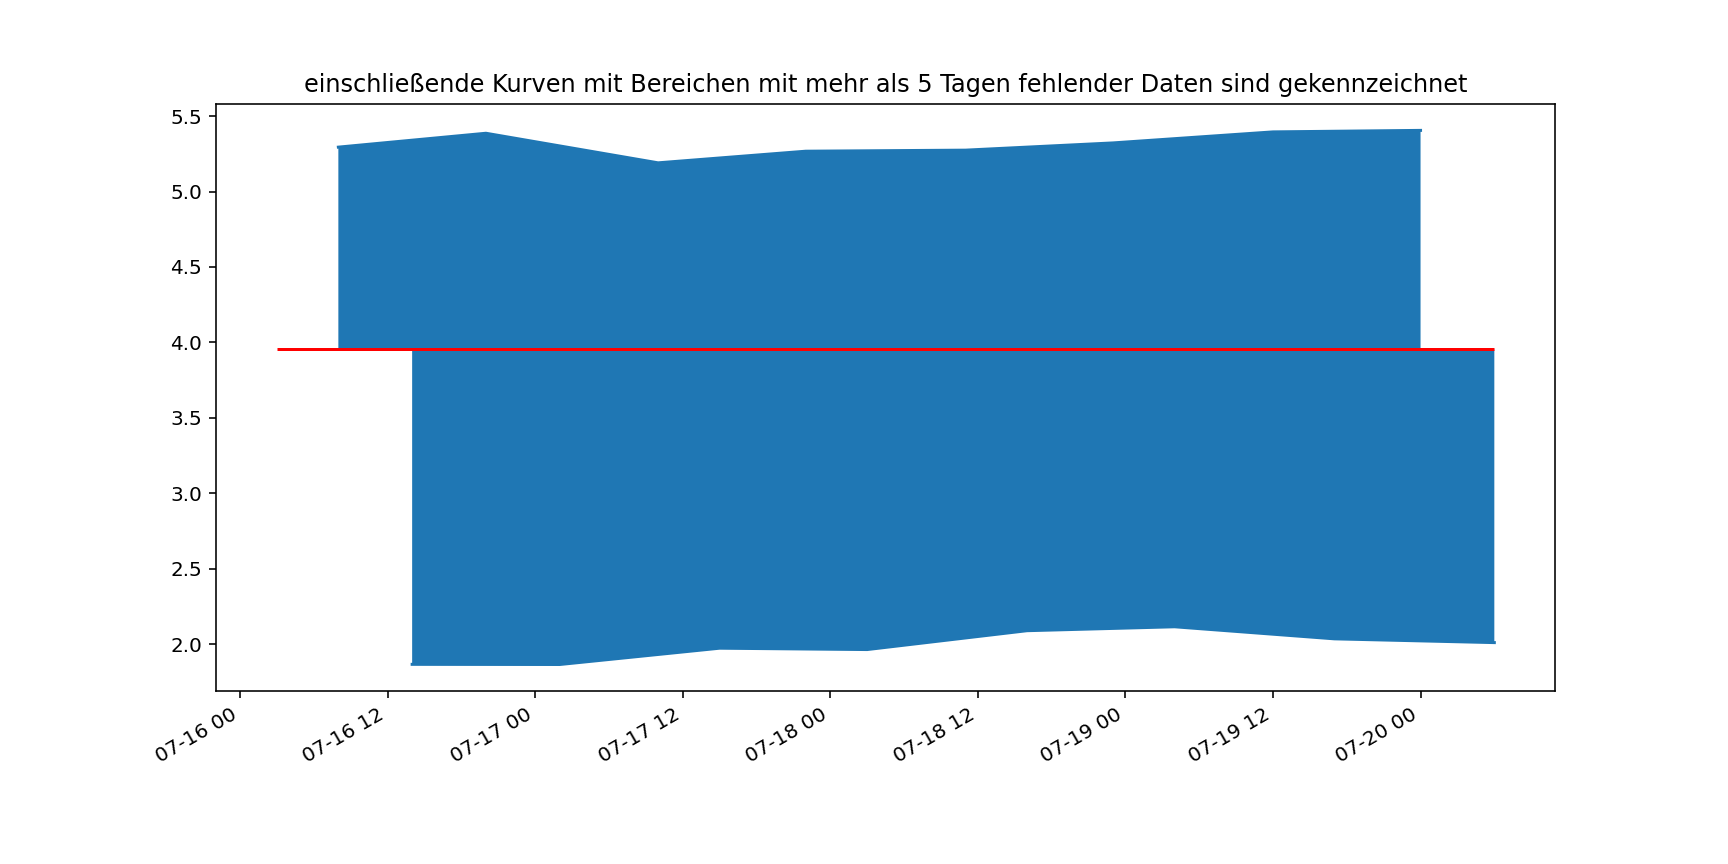

<IPython.core.display.Javascript object>


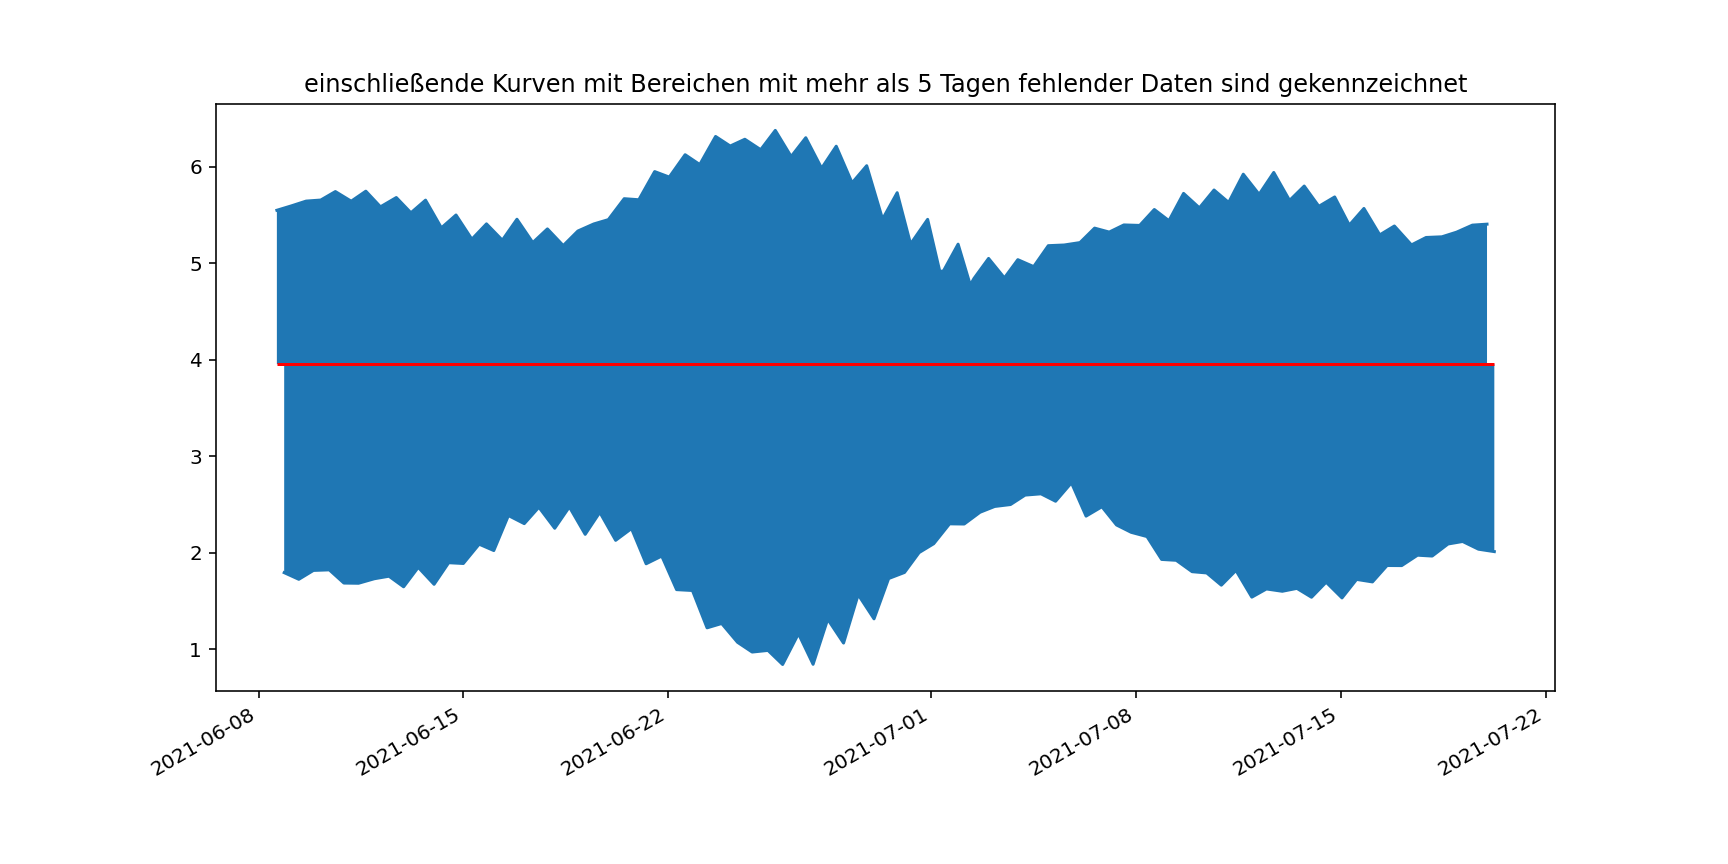

<IPython.core.display.Javascript object>


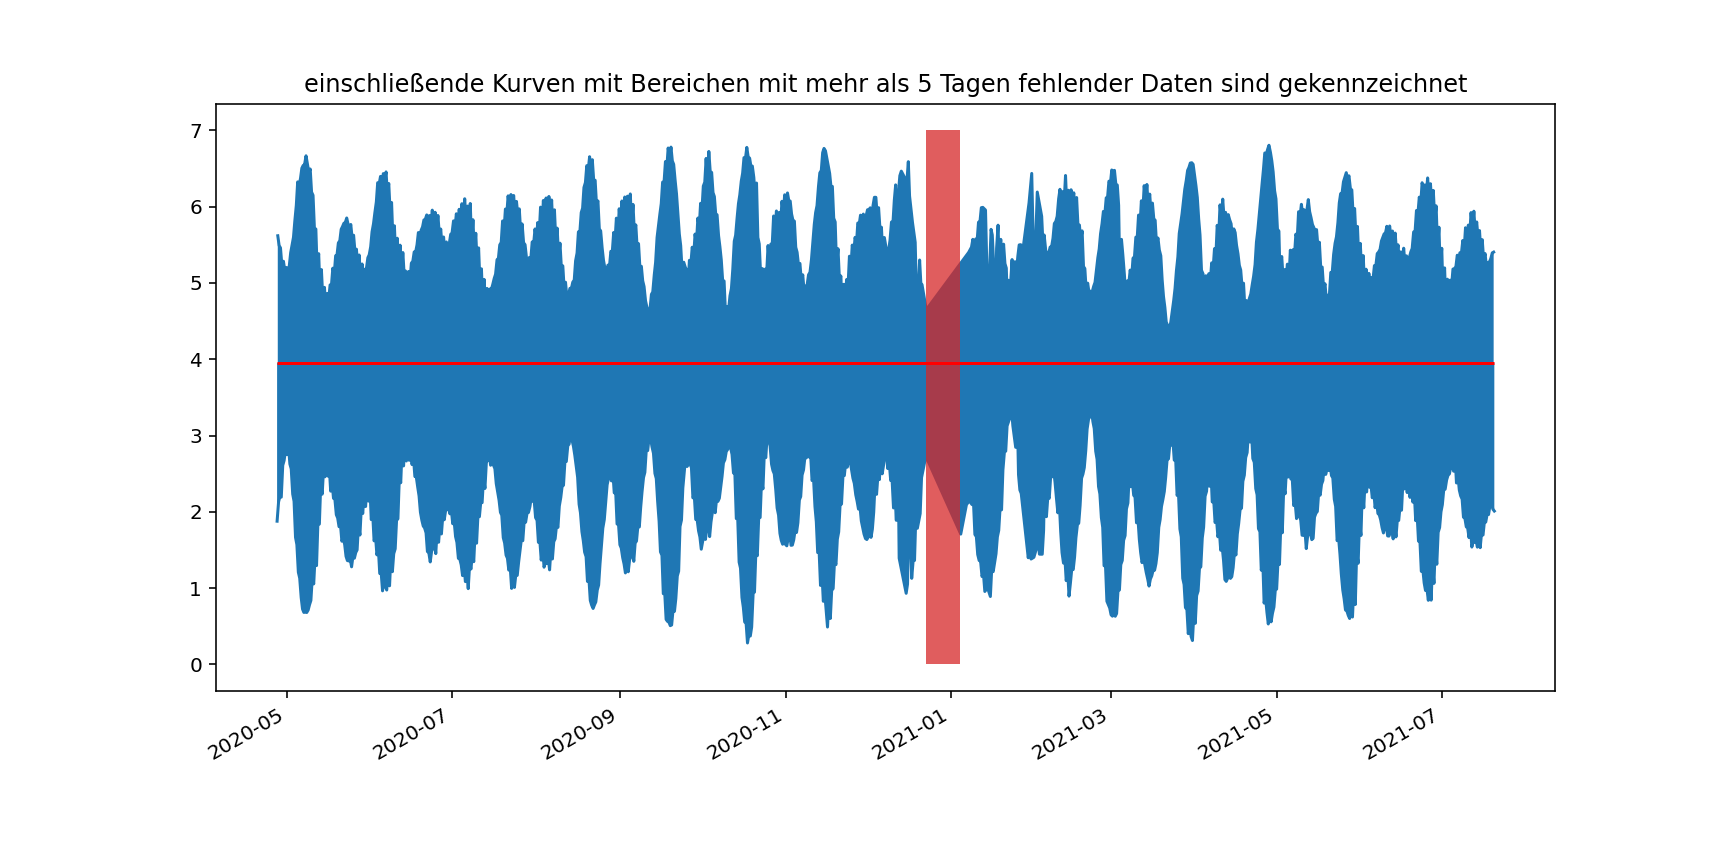

<IPython.core.display.Javascript object>


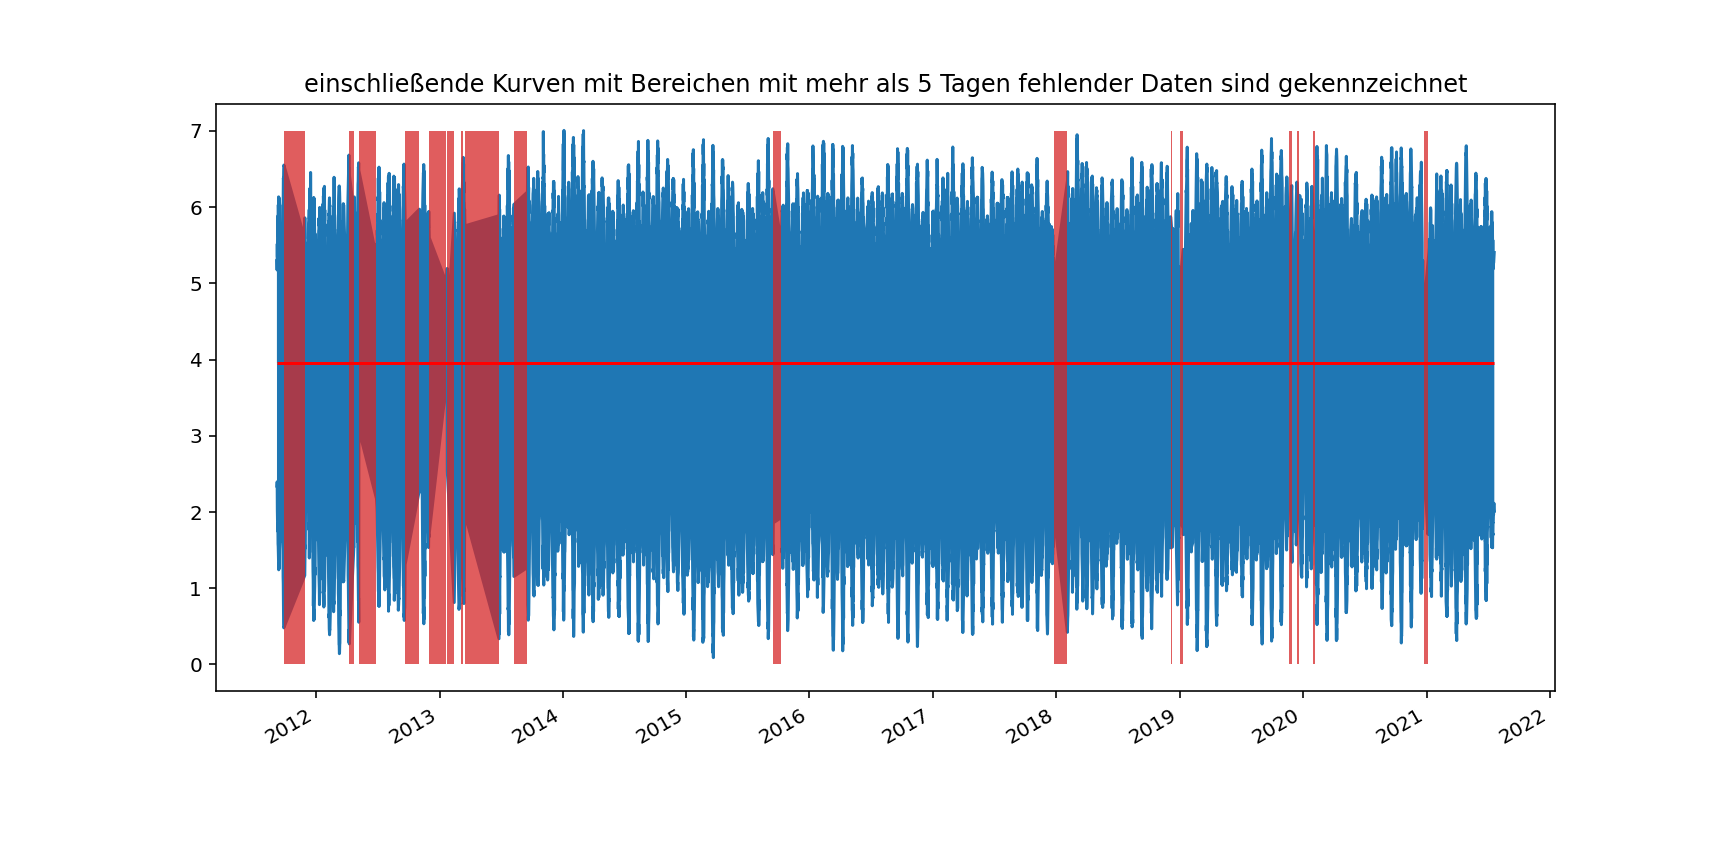

In [463]:
k = [100, 1000, 10000, len(data)-1]

for m in k:
    l = range(len(data)-1-m, len(data)-1)
    envelop_max = []
    envelop_min = []
    for i in l:
        if heights[i-1] <= heights[i] and heights[i+1] <= heights[i] and mean_heights < heights[i]:
            envelop_max.append((dates[i], heights[i]))
        elif heights[i-1] >= heights[i] and heights[i+1] >= heights[i] and mean_heights > heights[i]:
            envelop_min.append((dates[i], heights[i]))

    breaks = []
    for i in l:
        if (dates[i+1]-dates[i]).item().total_seconds()/3600 > 5*24:
            breaks.append((dates[i], dates[i+1]-dates[i]))

    fig, ax = plt.subplots()
    ax.plot([e[0] for e in envelop_max], [e[1] for e in envelop_max], color='tab:blue', zorder=1)
    ax.plot([e[0] for e in envelop_min], [e[1] for e in envelop_min], color='tab:blue', zorder=1)
    ax.fill_between([e[0] for e in envelop_max], [e[1] for e in envelop_max], mean_heights, facecolor='tab:blue', zorder=0)
    ax.fill_between([e[0] for e in envelop_min], [e[1] for e in envelop_min], mean_heights, facecolor='tab:blue', zorder=0)
    ax.broken_barh(breaks, (0, 7), facecolors='tab:red', zorder=2, alpha=0.75)
    plt.hlines(mean_heights, dates[l[0]], dates[l[-1]], color='r')
    fig.autofmt_xdate()
    ax.set_title('einschließende Kurven mit Bereichen mit mehr als 5 Tagen fehlender Daten sind gekennzeichnet')

## time between high and low tide